In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import analysis as an

# Connectivity Analysis


In [2]:
from pathlib import Path

data_folder = Path.cwd() / '..' / 'data'
data_folder = data_folder.resolve()
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]

[PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-07-141330'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-11-122231'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-11-155541'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-12-110727'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-12-111518'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-12-111553'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-12-120803'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-13-122225'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/2017-12-21-001108'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/data/short')]

In [20]:
df = an.get_iperf_folder(data_folder / '2017-12-21-001108', recursive=True)
# df = an.get_iperf_folder(data_folder / '2017-12-12-111553', recursive=True)
df.groupby(['server', 'client'])['server bits per second'].describe()

count          mean           std         min         25%  \
server client                                                              
nuc10  nuc13   600.0  6.487223e+07  1.544952e+06  47769900.0  63962300.0   
       nuc4    600.0  1.686645e+07  8.010306e+05  12583100.0  16384000.0   
       nuc6    600.0  6.042790e+07  1.560113e+06  45935300.0  59639675.0   
nuc11  nuc13   600.0  4.750157e+06  3.625305e+05   3603890.0   4521727.5   
       nuc4    600.0  6.490468e+06  1.085354e+06    327628.0   6226325.0   
nuc12  nuc4    600.0  3.900505e+07  1.707355e+06  33032900.0  38011450.0   
       nuc6    600.0  1.756190e+07  8.283940e+05  12778300.0  17039425.0   
nuc13  nuc10   600.0  6.835327e+07  1.405568e+06  56024800.0  67447675.0   
       nuc11   600.0  7.354122e+06  5.995978e+05   3014430.0   7077745.0   
       nuc4    600.0  9.465583e+06  1.536341e+06    589825.0   9240980.0   
       nuc6    600.0  3.270989e+07  1.831477e+06  25755100.0  31914950.0   
nuc4   nuc10   600.0  5.745048e+06  2.446943e+06   1506130.0   3999997.5   
       nuc11   600.0  2.448941e+06  1.491224e+06    196654.0   1048877.5   
       nuc12   600.0  5.676404e+06  5.945708e+06   1179610.0   2883692.5   
       nuc13   600.0  2.655555e+06  4.963685e+05    720363.0   2424827.5   
       nuc6    600.0  1.386359e+07  3.315164e+06    196593.0  13893400.0   
nuc6   nuc10   600.0  5.661425e+07  9.127136e+05  46526100.0  56076475.0   
       nuc12   600.0  1.922706e+07  4.672030e+05  15792300.0  19005350.0   
       nuc13   600.0  1.988209e+07  3.266647e+05  16841500.0  19725875.0   
       nuc4    600.0  2.723446e+07  1.273277e+06  20510800.0  26522775.0   

                      50%         75%         max  
server client                                      
nuc10  nuc13   64948200.0  65865650.0  68740900.0  
       nuc4    16908200.0  17383650.0  18873900.0  
       nuc6    60489750.0  61467950.0  65010500.0  
nuc11  nuc13    4783885.0   5046272.0   5570740.0  
       nuc4     6684905.0   7143040.0   8192350.0  
nuc12  nuc4    39093800.0  40171450.0  44567600.0  
       nuc6    17694400.0  18152425.0  19333100.0  
nuc13  nuc10   68384850.0  69267525.0  71626100.0  
       nuc11    7601515.0   7798267.5   8257730.0  
       nuc4     9830300.0  10223425.0  11796800.0  
       nuc6    32899850.0  34014750.0  35980000.0  
nuc4   nuc10    4685785.0   8454247.5  10748100.0  
       nuc11    2359015.0   3603630.0   5767130.0  
       nuc12    3636630.0   4800682.5  27066700.0  
       nuc13    2752410.0   2949140.0   4456340.0  
       nuc6    14680150.0  15401300.0  17957300.0  
nuc6   nuc10   56754176.0  57280800.0  58259400.0  
       nuc12   19268050.0  19529800.0  20185000.0  
       nuc13   19922700.0  20119125.0  20644600.0  
       nuc4    27328500.0  28048475.0  32113300.0

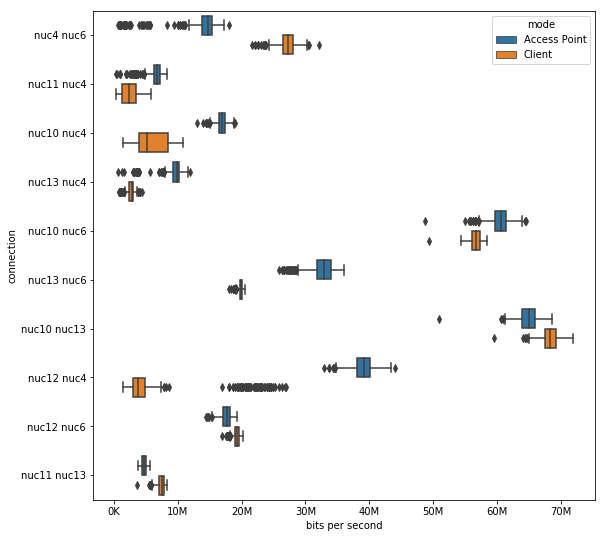

In [13]:
fig, ax = plt.subplots(figsize=(9,9))
sns.boxplot(
    x='bits per second',
    y='connection',
    data=df,
    hue='mode',
#     split=True,
#     cut=0
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

# Map

In [5]:
from bokeh.io import push_notebook, show, output_notebook
output_notebook()


Loading BokehJS ...

In [6]:
import networkx as nx
import twistmap

G = nx.DiGraph()
G.add_nodes_from(twistmap.node_positions.keys())
means = df.groupby(['server', 'client'])['server bits per second'].mean().to_dict()
for key in means:
    G.add_edge(key[0], key[1], {'weight': means[key]})

In [7]:
plot = twistmap.create_map()
twistmap.draw_graph(plot, G)
show(plot, notebook_handle=True);